## This attempt models after net voter and majority

some thoughts:
start with learning from self. 
other models where one can learn from others

start with each 1:1 learning to adjust performance and expectation
other model to compare where machines learn across people



In [77]:

%matplotlib inline 
#taken from assignment

import networkx as nx
import numpy
import matplotlib.pyplot as plt

from networkx.algorithms import bipartite

#import matplotlib
#matplotlib.use('TkAgg')

import pylab as PL
import random as RD



RD.seed()

PoorVAProb = 0.2 #proability that VA severely underperforms

#col = {0:'w', 1:'k'} --  consider a property for perceivers only that illustrates level of expectations met


## Create graph

In [62]:
B = nx.Graph()  #nx path graph?
#B.pos = nx.spring_layout(B)
B.add_nodes_from([1,2,3,4, 5, 6], bipartite=0) #perceivers, top nodes
# Add the node attribute "bipartite" - Targets = 1
B.add_nodes_from(['a','b','c', 'd','e', 'f', 'g', 'h', 'm', 'q'], bipartite=1)
B.add_edges_from([(1,'a'), (1,'e'), (1,'f'), (2,'b'), (2,'e'), (2,'g'), 
                  (3,'c'), (3,'e'), (3,'h'),(3,'g'),(4,'d'), (5, 'm'), (6, 'q')])



In [63]:
print((B.number_of_nodes(), B.number_of_edges())) 


(16, 13)


In [55]:
# try naming sets
#perceivers = set([1,2,3,4,5,6])
#bipartite.is_bipartite_node_set(G,perceivers)


True

In [53]:
#targets = set(['a','b','c', 'd','e', 'f', 'g', 'h', 'm', 'q'])
#targets, perceivers = bipartite.sets(G)

AmbiguousSolution: Disconnected graph: Ambiguous solution for bipartite sets.

In [64]:
nx.is_connected(B)


False

In [65]:
#make them targets and perceivers
perceivers = {n for n, d in B.nodes(data=True) if d['bipartite']==0} # perceivers top
targets = set(B) - perceivers

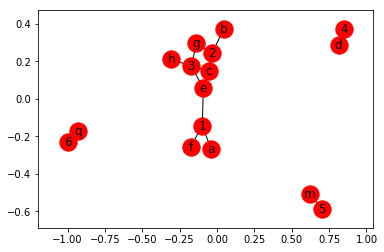

In [66]:
#B_layout = nx.spring_layout(B, iterations=1000)
#nx.draw_networkx(B, pos=B_layout)
#why are there no edges????
nx.draw_networkx(B)

## Add attributes

In [67]:


#SET INITIAL WEIGHTS FOR EXPECTATIONS

B.node['a']['VA.type'] = 'personal assistant'
B.node['b']['VA.type'] = 'personal assistant'
B.node['c']['VA.type'] = 'personal assistant'
B.node['d']['VA.type'] = 'personal assistant'
B.node['m']['VA.type'] = 'personal assistant'
B.node['e']['VA.type'] = 'bank assistant'  # could open up learning through neighbors since public interaction
B.node['f']['VA.type'] = 'customer service assistant'
B.node['g']['VA.type'] = 'customer service assistant'
B.node['h']['VA.type'] = 'purchasing assistant'
B.node['q']['VA.type'] = 'health assistant'

#B.node['1']['expectation.1'] = 20 #an independent expectation? or owned by edge?
#say there are x factors involved in expectation. start with 3
#FIXME values are placeholders
B.adj[1]['a']['expectation.1'] = 20 #array.1 #FIXME to define array somewhere 
B.adj[1]['a']['expectation.2'] = 20 
B.adj[1]['a']['expectation.3'] = 20 

B.adj[1]['e']['expectation.1'] = 20 
B.adj[1]['e']['expectation.2'] = 20 
B.adj[1]['e']['expectation.3'] = 20 

B.adj[1]['f']['expectation.1'] = 20 #owned by edge so part of relationship
B.adj[1]['f']['expectation.2'] = 20 
B.adj[1]['f']['expectation.3'] = 20 #owned by edge so part of relationship

B.adj[2]['b']['expectation.1'] = 20 
B.adj[2]['b']['expectation.2'] = 20 
B.adj[2]['b']['expectation.3'] = 20 

B.adj[2]['e']['expectation.1'] = 20 
B.adj[2]['e']['expectation.2'] = 20 
B.adj[2]['e']['expectation.3'] = 20 

B.adj[2]['g']['expectation.1'] = 20 
B.adj[2]['g']['expectation.2'] = 20 
B.adj[2]['g']['expectation.3'] = 20 

B.adj[3]['c']['expectation.1'] = 20 
B.adj[3]['c']['expectation.2'] = 20 
B.adj[3]['c']['expectation.3'] = 20 

B.adj[3]['e']['expectation.1'] = 20 
B.adj[3]['e']['expectation.2'] = 20 
B.adj[3]['e']['expectation.3'] = 20 

B.adj[3]['h']['expectation.1'] = 20 
B.adj[3]['h']['expectation.2'] = 20 
B.adj[3]['h']['expectation.3'] = 20 

B.adj[3]['g']['expectation.1'] = 20 
B.adj[3]['g']['expectation.2'] = 20 
B.adj[3]['g']['expectation.3'] = 20 

B.adj[4]['d']['expectation.1'] = 20 
B.adj[4]['d']['expectation.2'] = 20 
B.adj[4]['d']['expectation.3'] = 20 

B.adj[5]['m']['expectation.1'] = 20 
B.adj[5]['m']['expectation.2'] = 20 
B.adj[5]['m']['expectation.3'] = 20 

B.adj[6]['q']['expectation.1'] = 20 
B.adj[6]['q']['expectation.2'] = 20 
B.adj[6]['q']['expectation.3'] = 20 

#setting performance variables
##Starting with performance variables as being owned by VA. but really should be owned by edge...

B.node['a']['performance.1'] = 0
B.node['a']['performance.2'] = 0
B.node['a']['performance.3'] = 0

B.node['b']['performance.1'] = 0
B.node['b']['performance.2'] = 0
B.node['b']['performance.3'] = 0

B.node['c']['performance.1'] = 0
B.node['c']['performance.2'] = 0
B.node['c']['performance.3'] = 0

B.node['d']['performance.1'] = 0
B.node['d']['performance.2'] = 0
B.node['d']['performance.3'] = 0

B.node['e']['performance.1'] = 0
B.node['e']['performance.2'] = 0
B.node['e']['performance.3'] = 0

B.node['f']['performance.1'] = 0
B.node['f']['performance.2'] = 0
B.node['f']['performance.3'] = 0

B.node['g']['performance.1'] = 0
B.node['g']['performance.2'] = 0
B.node['g']['performance.3'] = 0

B.node['h']['performance.1'] = 0
B.node['h']['performance.2'] = 0
B.node['h']['performance.3'] = 0

B.node['m']['performance.1'] = 0
B.node['m']['performance.2'] = 0
B.node['m']['performance.3'] = 0

B.node['q']['performance.1'] = 0
B.node['q']['performance.2'] = 0
B.node['q']['performance.3'] = 0

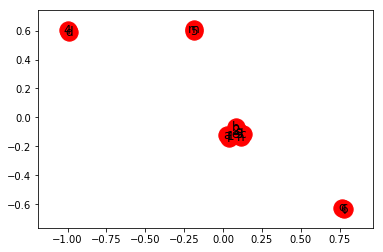

In [68]:
B_layout = nx.spring_layout(B, iterations=1000)
nx.draw_networkx(B, pos=B_layout)

## (placeholder) set initial expectations and performance values

In [74]:
def init():
    global B, nextB
    
    time = 0
    
    B = nx.Graph() # do i need to state this again?
    
    nextB = B.copy()
    #do i need to return anythign else?

## Draw network. NEED TO FILL THIS OUT


In [75]:
def draw():
    PL.cla()
    nx.draw(B) #, pos = positions, edge_color = [col[network.node[n]['state']] for n in network.nodes()])
    PL.axis('image')
    PL.title('t = ' + str(time))

## The STEP

In [71]:
def step():
    global time, B, nextB

    time += 1

 
    for i in B.nodes(): #for i in perceiver():
        if B.node[i]['performance.1'] == B.adj[i][j]['expectation.1'] :
           # nextB.node[i]['state'] = 100 #FIXME placeholder value
            nextB.adj[perceiver][target]['expectation.1'] = 50
            for j in B.adj(i):
                if B.adj[j]['expectation.1'] < 60 : #if it's generally high
                    if RD.random() < PoorVAProb:
                   # if RD.random() < infectionProb:
                        nextB.node[i]['expectation.1'] = 5
                        break
                    else: # adaptive link cutting behavior
                        nextB.node[i]['expectation.1'] = B.node[i]['expectation.1'] + 10
        if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1'] :        # if B.node[target]['performance.1'] < B.adj[perceiver][target]['expectation.1']

           nextB.adj[perceiver][target]['expectation.1'] = 10
           
                
        else:
             nextB.adj[perceiver][target]['expectation.1'] = B.adj[perceiver][target]['expectation.1'] + 40
                
    del B
    B = nextB.copy()

In [72]:
import pycxsimulator
pycxsimulator.GUI().start(func=[init,draw,step])

ImportError: No module named pycxsimulator

In [ ]:
## TO DO
create variablity in persoanl assistant performance (perform poorly .2 of time)
if x assistant ubnderperfoms 5 times, cut interaction.
low performance for one VA
and constant medium for other
consider adding office VA for shared in future model
add impression changes as expectations (p.959, Denrell.) 6th piece of info is weighted .3. And below50% when negaitve. 
